In [31]:
import random as rng
from itertools import product
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
class Card:
    def __init__(self,fig,col):
        self.slownik =[
            {
            '2' : '2',
            '3' : '3',
            '4' : '4',
            '5' : '5',
            '6' : '6',
            '7' : '7',
            '8' : '8',
            '9' : '9',
            '10' : '10',
            'J' : 'Jack',
            'Q' : 'Queen',
            'K' : 'King',
            'A' : 'Ace'},
            {
            'H': 'Hearts',
            'D': 'Diamonds',
            'C': 'Clubs',
            'S': 'Spades'}
            ]
        
        
        while fig.upper() not in self.slownik[0].keys():
            print('błędne oznaczenie figury karty')
            fig = input('Podaj poprawne oznaczenie figury karty: ')
        self.figure = fig.upper()
        
        while col.upper() not in self.slownik[1].keys():
            print('błędne oznaczenie koloru karty')
            col = input('Podaj poprawne oznaczenie koloru karty: ')
        self.colour = col.upper()
        

        rank_dict = {figure : rank for rank,figure in enumerate(self.slownik[0].keys())}
        self.rank_of_card = rank_dict[self.figure]

    def __enter__(self):
        return self

    def __str__(self):
        return f'{self.slownik[0][self.figure]} of {self.slownik[1][self.colour]}'
    
    def __repr__(self):
        return f'{self.figure}{self.colour}'

    def __lt__(self,other):
        return self.rank_of_card < other.rank_of_card
    def __le__(self,other):
        return self.rank_of_card <= other.rank_of_card
    def __gt__(self,other):
        return self.rank_of_card > other.rank_of_card
    def __ge__(self,other):
        return self.rank_of_card >= other.rank_of_card
    def __eq__(self,other):
        return self.rank_of_card == other.rank_of_card

definicja obiektu <u>KARTA</u>, z atrybutamni

In [33]:
class Deck:
    def __init__(self):
        figures = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
        colours = 'H D C S'.split()
        self.talia = []
        for i in product (figures, colours):
            self.talia.append(Card(i[0], i[1]))
    def __len__(self):
        return len(self.talia)
    
    def __enter__(self):
        return self

    def __str__(self):
        return f'karty w talii [{len(self)}]: \n{self.talia}\n * * * * *'
    def shuffle(self):
        temp_deck = self.talia[:]
        self.talia = []
        while temp_deck:
            self.talia.append(temp_deck.pop(rng.randint(0,len(temp_deck)-1)))
        #print(temp_deck)
    def draw(self, n = 1):
        card_list = []
        while n:
            card_list.append(self.talia.pop())
            n-=1
        return card_list
    def reset(self):
        self.__init__()
        self.shuffle()


In [34]:
class Hand:
    def __init__(self):
        self.cards_in_hand =  []
        self.cards_on_table = []
        self.high_card = None
        self.in_hand = {
            'high_card' : None,
            'pairs' : [],  # pairs
            'two_pairs' : [],
            'threes' : [], # threes
            'straight' : [], # straights
            'flush' : [], # flushes
            'full_house' : [], #full house
            'fours' : [], # fours of a kind
            'straight_flush' : [] # straight flushes
            }
    def get_card(self, talia: Deck, n :int):
        for card in talia.draw(n):
            self.cards_in_hand.append(card)
        self.find_high_card()
    
    def get_specific_cards(self, talia: Deck, list_of_cards: list):
        for card in list_of_cards:
            self.cards_in_hand.append(Card(card.upper()[:-1],card.upper()[-1]))
            for id, card_in_deck in enumerate(talia.talia):
                if card_in_deck.figure == card.upper()[:-1] and card_in_deck.colour == card.upper()[-1]:
                    del talia.talia[id]
        self.find_high_card()

    def find_high_card(self):
        self.high_card = (self.cards_in_hand[0])
        for card in self.cards_in_hand:
            if card.rank_of_card > self.high_card.rank_of_card:
                self.high_card = card

    def __str__(self):
        return f'cards in hand:\n{sorted(self.cards_in_hand)}\nHigh Card: {self.high_card}'

    def reset_hand(self):
        self.__init__()
        
    def check_hand(self):
        #print('**********')
        
        ranks = sorted(set([card.rank_of_card for card in self.cards_in_hand+self.cards_on_table]))
        rank_diffs = [ranks[i+1] - ranks[i] for i in range(len(ranks)-1)]
        for i in range(len(rank_diffs)-4):
            if rank_diffs[i:4+i] == [1,1,1,1]:
                self.in_hand ['straight'] = ranks[4+i]
        
        if len(ranks) >= 5:
                if [ranks[i+1] - ranks[i] for i in range(0,4)] == [1,1,1,1]:
                    self.in_hand['straight'] = ranks[-1]

        self.high_card = (sorted(self.cards_in_hand)[-1], ranks[-1])
        self.in_hand['high_card'] = ranks[-1]

        figures_in_hand = [card.rank_of_card for card in self.cards_in_hand+self.cards_on_table]  
        
        #print(self.cards_in_hand)
        #print(f'{sorted(figures_in_hand)=}')
        ile_czego   = list(Counter(sorted(figures_in_hand)).items())
        ile_kolorow = sorted(Counter([card.colour for card in self.cards_in_hand+self.cards_on_table]).items(), key = lambda x: x[1], reverse = True)
        #print(f'{ile_kolorow=}')
        if ile_kolorow[0][1] == 5 :
            self.in_hand['flush'] = self.cards_in_hand[0].colour

        if self.in_hand['flush'] and self.in_hand['straight']:
            self.in_hand['straight_flush'] = self.in_hand['straight']

        #print(f'{ile_czego = }')
        while len(ile_czego):
            a = ile_czego.pop()
            if a[1] == 2:
                self.in_hand['pairs'].append(a[0])
            elif a[1] == 3:
                self.in_hand['threes'].append(a[0])
            elif a[1] == 4:
                self.in_hand['fours'].append(a[0])

        if len(self.in_hand['pairs']) >= 2:
            self.in_hand['two_pairs'] = sorted(self.in_hand['pairs'],reverse=True)[:2]
        if all([self.in_hand['threes'],self.in_hand['pairs']]):
            self.in_hand['full_house'] = (self.in_hand['threes']+ self.in_hand['pairs'])
        if len(self.in_hand['threes'])>=2:
            self.in_hand['full_house'] = self.in_hand['threes']



    def __lt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] < other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) < max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])


    def __eq__(self, other):
        if self.in_hand['high_card'] == other.in_hand['high_card']:
            return max([i for i, suit in enumerate(self.in_hand.items()) if suit]) == max([i for i, suit in enumerate(self.in_hand.items()) if suit])
        else:
            return False


    def __gt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] > other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) > max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])

        #print(self.in_hand)
        #print([q for q in self.in_hand.items() if q[1] != []])

In [35]:
def texas_holdem_monte_carlo(karty_w_rece: list, karty_na_stole: list(), ilosc_graczy = 2, wielkosc_proby = 2_000):
    talia = Deck()
    wygrane = 0
    for game in range(wielkosc_proby):
        gracze = []
        moja_reka = Hand()
        moja_reka.get_specific_cards(talia, karty_w_rece)
        stol = Hand()
        stol.get_specific_cards(talia, karty_na_stole)
        moja_reka.cards_on_table = stol.cards_in_hand
        moja_reka.check_hand()
        gracze.append(moja_reka)
        talia.shuffle()

        for _ in range(0,ilosc_graczy-1):
            gracze.append(Hand())
            gracze[-1].get_card(talia,2)
            gracze[-1].cards_on_table = stol.cards_in_hand
            gracze[-1].check_hand()

        talia.reset()

        wygrane += (moja_reka == sorted(gracze)[-1])# and (sorted(gracze)[-1] != sorted(gracze)[-2])
        #print(sorted(gracze)[-1].in_hand) if moja_reka != sorted(gracze)[-1] else False
    
    #print([f'{gr.cards_on_table}' for gr in gracze])
    #print(f'max = {max(gracze)}')
    #print(f'{wygrane/wielkosc_proby:.2%}')
    return wygrane/wielkosc_proby

In [36]:
def pokaz_wykresy(raczka: list, stolik: list, N = 1000):
    X = [2,3,4,5,6,7,8,9]
    n = len(stolik) - 2

    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 4*n ,4
    plt.rcParams['axes.grid'] = True


    turns = ['flop', 'turn', 'river']
    Y = {}

    fig = plt.figure(constrained_layout=True)
    ax_dict =fig.subplot_mosaic(mosaic = [turns[:n]], sharey = True, sharex= True)

    for i, t in enumerate(turns[:n]):
        Y = {}
        il_kart =3+i
        print(stolik[:il_kart])
        for x in X:
            Y [x] = texas_holdem_monte_carlo(raczka,stolik[0:il_kart],x,N)
            sns.lineplot(data = pd.DataFrame(Y.values(), index=Y.keys()),  ax = ax_dict[t], legend = False, markers='o')\
                .set(ylim=(0,1.05), xlim= (1.5,10),xticks = range(2,10), title = f'na stole: {stolik[0:il_kart]}')
            for q in Y.items():
                ax_dict[t].text(q[0]+0.05, q[1]+0.01, f'{q[1]*100:.0f}%', fontsize = 'medium')
                ax_dict[t].set_ylabel('prawdopodobieństwo wygranej')
                ax_dict[t].set_xlabel('ilość graczy przy stole')
        print(Y)
    fig.suptitle(f'karty w ręce: {raczka}')
    plt.tight_layout()
    plt.show()



['QS', '10S', 'kd']
{2: 0.9528, 3: 0.9102, 4: 0.8736, 5: 0.8502, 6: 0.8356, 7: 0.8108, 8: 0.784, 9: 0.772}
['QS', '10S', 'kd', 'Kh']
{2: 0.95, 3: 0.9114, 4: 0.879, 5: 0.8568, 6: 0.8422, 7: 0.8232, 8: 0.8136, 9: 0.794}
['QS', '10S', 'kd', 'Kh', '2H']
{2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


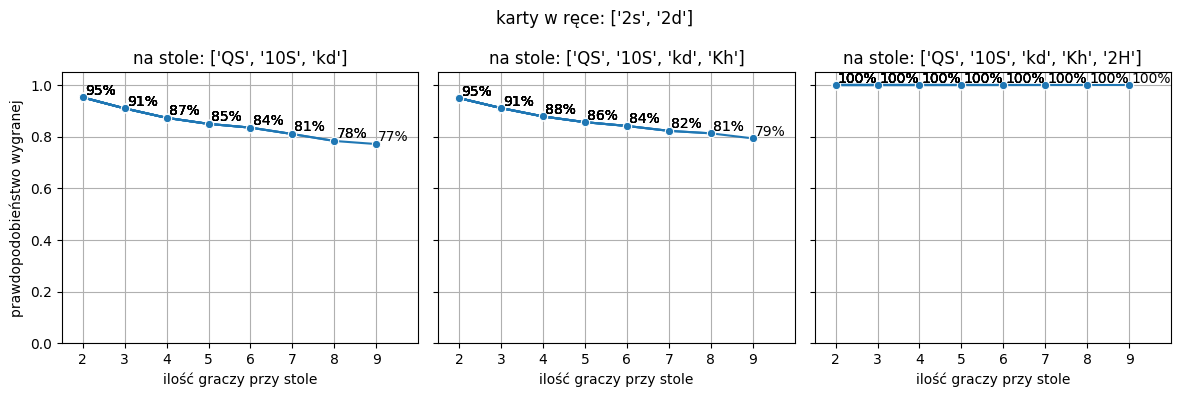

In [37]:
raczka = ['2s', '2d']
stolik = ['QS', '10S', 'kd', 'Kh','2H']

pokaz_wykresy(raczka,stolik,5000)



In [51]:
def texas_holdem_monte_carlo_2 (karty_w_rece: list, ilosc_graczy = 2, wielkosc_proby = 1000):
    talia = Deck()    
    wygrane = 0
    for game in range(wielkosc_proby):
        stol = Hand()
        talia.shuffle()
        gracze = []

        moja_reka = Hand()
        moja_reka.get_specific_cards(talia, karty_w_rece)

        stol.get_card(talia,5)
        moja_reka.cards_on_table = stol.cards_in_hand
        moja_reka.check_hand()

        gracze.append(moja_reka)

        print(f'*{gracze[-1].cards_on_table + gracze[-1].cards_in_hand}')

        for _ in range(0,ilosc_graczy-1):
            gracze.append(Hand())
            gracze[-1].get_card(talia,2)
            gracze[-1].cards_on_table = stol.cards_in_hand
            gracze[-1].check_hand()
            print(f'**{gracze[-1].cards_on_table + gracze[-1].cards_in_hand}')
        wygrane += moja_reka == sorted(gracze)[-1]# and (sorted(gracze)[-1] != sorted(gracze)[-2])
        talia.reset()

        
    return wygrane/wielkosc_proby

In [52]:
def pokaz_wykresy_2(raczka: list, N = 1000):
    X = [2,3,4,5,6,7,8,9]
    n = len(stolik) - 2

    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 4 ,4
    plt.rcParams['axes.grid'] = True


    Y = {}

    fig = plt.figure(constrained_layout=True)

    for x in X:
        Y [x] = texas_holdem_monte_carlo_2(raczka,x,N)
        sns.lineplot(data = pd.DataFrame(Y.values(), index=Y.keys()), legend = False, markers='o')\
            .set(ylim=(0,1.05), xlim= (1.5,10),xticks = range(2,10), title = f'w ręce: {raczka}',
            ylabel = 'prawdopodobieństwo wygranej', xlabel = 'ilość graczy przy stole')
        
    for q in Y.items():
        plt.text(q[0]+0.05, q[1]+0.01, f'{q[1]*100:.0f}%', fontsize = 'medium')

    plt.tight_layout()
    plt.show()
    


*[QS, 4H, 6H, 5D, QD, 3S, 6S]
**[QS, 4H, 6H, 5D, QD, 9C, 5H]
*[9S, 10C, 6C, 3C, 8S, 3S, 6S]
**[9S, 10C, 6C, 3C, 8S, JH, 2S]
*[4S, 2S, 10H, 6H, 8H, 3S, 6S]
**[4S, 2S, 10H, 6H, 8H, 3D, JD]
**[4S, 2S, 10H, 6H, 8H, QC, AD]
*[10C, 7D, 10H, QH, JC, 3S, 6S]
**[10C, 7D, 10H, QH, JC, 8H, KH]
**[10C, 7D, 10H, QH, JC, AS, 4D]
*[10D, KC, 2H, 10H, 9S, 3S, 6S]
**[10D, KC, 2H, 10H, 9S, 5C, 9H]
**[10D, KC, 2H, 10H, 9S, QH, 4S]
**[10D, KC, 2H, 10H, 9S, 5H, 5D]
*[8D, 5S, 2D, 8C, 4H, 3S, 6S]
**[8D, 5S, 2D, 8C, 4H, 4D, 10H]
**[8D, 5S, 2D, 8C, 4H, QC, 3D]
**[8D, 5S, 2D, 8C, 4H, 2S, 8H]
*[AD, JH, JC, 2D, 10S, 3S, 6S]
**[AD, JH, JC, 2D, 10S, 7H, 9H]
**[AD, JH, JC, 2D, 10S, AH, 10H]
**[AD, JH, JC, 2D, 10S, 8H, JS]
**[AD, JH, JC, 2D, 10S, 7S, 9S]
*[4D, QS, JS, AS, KS, 3S, 6S]
**[4D, QS, JS, AS, KS, KC, 2D]
**[4D, QS, JS, AS, KS, 9H, 3D]
**[4D, QS, JS, AS, KS, 9S, QD]
**[4D, QS, JS, AS, KS, 10S, 9C]
*[10C, 5D, 7D, 7C, QC, 3S, 6S]
**[10C, 5D, 7D, 7C, QC, 2H, 10H]
**[10C, 5D, 7D, 7C, QC, 5H, 8S]
**[10C, 5D, 7D, 7

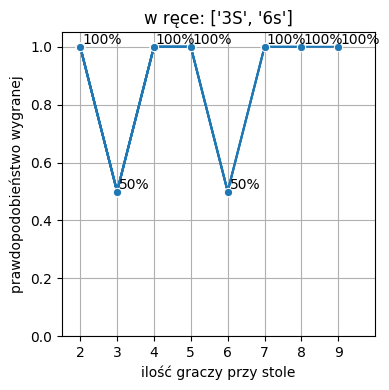

In [54]:
pokaz_wykresy_2(['3S', '6s'],2)